In [56]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time

In [231]:
df_full = pd.read_csv('Data/hotwheels_done.csv')
len(df_full)
path = 'Data/hotwheels_done.npy'
post_list = np.load(path,allow_pickle=True)

In [232]:
# Thuật toán in ra toàn bộ comments và thông tin của người comment theo từng bài viết.
x = len(df_full['comments_full'])
res = []
for i in range(x):
    res.append(df_full['comments_full'][i])
res

['[{\'comment_id\': \'1085531565938845\', \'comment_url\': \'https://facebook.com/1085531565938845\', \'commenter_id\': \'100001757861021\', \'commenter_url\': \'https://facebook.com/mikey.brown.338211?eav=Afa3xpPpHL72UkGxYM5RxhfGVEExp2bKHZvFOuVwKszJNLHhEj6jld49EUy5hi-GAhE&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Mikey Brown\', \'commenter_meta\': None, \'comment_text\': \'Can’t wait to see ya there ✌️\', \'comment_time\': datetime.datetime(2023, 11, 9, 9, 0), \'comment_image\': \'https://scontent-sin6-4.xx.fbcdn.net/v/t39.30808-6/399029486_6802447256490469_7293078181442293530_n.jpg?stp=cp0_dst-jpg_e15_q65_s180x540&_nc_cat=101&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=KQew9jea0jIAX8YmRSh&_nc_ht=scontent-sin6-4.xx&oh=00_AfAuyC4-F1W47L7FUj720VidVVhrfij41WE_nBIHR-tZMw&oe=6553C36A\', \'comment_reactors\': [{\'name\': \'Sawyer Kayden\', \'link\': \'https://facebook.com/profile.php?id=100082138123979&eav=Afagr0sfpBu8my4n_HmfnWhIlD4_eq5YKD1pE53mhh8_PzwgXmDXsxgz

In [233]:
x = max(res)
print(x.count('comment_text'))
print(max(df_full['comments']))

71
599


Do có khá nhiều bài viết đã bị chặn truy cập, dẫn tới sự thiếu hụt trong dữ liệu. Số comments nhiều nhất của một bài viết thu được là 71 (Phân tích bằng phương pháp tìm tổng số comments trong một bài viết). Trong khi đó, trường dữ liệu 'comments' cho biết tổng số comments của mỗi bài viết, lại ghi nhận số liệu lớn nhất là 599. Tóm lại, công cụ facebook scraper không thể hoàn toàn cào được đầy đủ dữ liệu vì nhiều nguyên nhân khác nhau.

In [234]:
post_list = post_list.tolist()
post_list

[[663497495969085,
  'Only ten cars remain but only one car will take the crown!\r\n\r\nTune in this SATURDAY at 9am PST and see which car will be immortalized into a HotWheels die-cast.',
  '2023-11-09 23:45:33',
  1699573533,
  "['https://scontent-sin6-1.xx.fbcdn.net/v/t39.30808-6/400970886_663497059302462_3671738979325502061_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=XMV91DUIPrAAX_8kAqI&_nc_ht=scontent-sin6-1.xx&oh=00_AfBLUGqZOj8_80WScZo60F2J-vOrFUkQKJpWDdyB5NV2mw&oe=6553D86D&manual_redirect=1', 'https://scontent-sin6-1.xx.fbcdn.net/v/t39.30808-6/401390559_663497109302457_5937567943611842959_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=kiqCt69VQ0oAX-4Ikcs&_nc_ht=scontent-sin6-1.xx&oh=00_AfAQ6sbrDkaU7tBblYat7eeMbmizIPPkrDxZPHBGIAaujg&oe=65527A84&manual_redirect=1', 'https://scontent-sin6-1.xx.fbcdn.net/v/t39.30808-6/401015543_663497145969120_7914681402502162179_n.jpg?stp=cp0_dst-jpg_e15_fr_q

In [235]:
a = df_full['text'].tolist()
print("có tất cả ",len(a),"bài viết")
res = []
for i in a :
  if "Hot Wheels Legends Tour" in i: res.append(i)
print(len(res),"bài viết chưa từ khóa trên")
res

có tất cả  100 bài viết
18 bài viết chưa từ khóa trên


['Tune in this Saturday for the Hot Wheels Legends Tour Global Grand Finale and see which car will be chosen to be immortalized into a Hot Wheels 1:64 scale die-cast.\r\n\r\nStreaming live 11.11.2023 at 9am PST on Hot Wheels social channels and MattelCreations.com.',
 'This Saturday marks the sixth Hot Wheels Legends Tour Global Finale.\r\n\r\nBefore we crown a new winner, let’s open up the vault and take a look back at all of our previous winners. 🏆',
 'Join us for the Semi-Finals of the Hot Wheels Legends Tour! Watch LIVE judging from a panel of celebrities and top motorsport athletes, including Coco Zurita, Aimee Shackelford, and Eric Kendricks\r\nThe Hot Wheels Legends Tour, now in its sixth year, is a global search for the next fan-made custom car to be made into a Hot Wheels die-cast.\r\n\r\nThe Hot Wheels Legends Tour is made possible in partnership with Walmart and Presenting Sponsor, Mobil 1.\r\nLearn more about the Hot Wheels Legends Tour at www.hotwheels.com/legends',
 'SUN,

18% số bài viết trong 100 bài mới nhất đều là về Hot Wheels Legends Tour, một cuộc thi độ xe quy mô lớn được tổ chức tại Mĩ bởi công ty mẹ Mattel (sở hữu dòng đồ chơi Hot Wheels), nhằm tìm ra chiếc xe thắng cuộc để làm thành mô hình tỷ lệ 1:64. Ta có thể thấy cuộc thi này đóng vai trò rất lớn trong kế hoạch truyền thông và quảng bá của hãng đồ chơi.

## =======================================================================================================

## Tìm những từ xuất hiện nhiều tiêu đề các bài đăng.

In [236]:
df_full['text']
text = "" 
for i in df_full['text']:
  text=text+i+"\n"

In [237]:
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

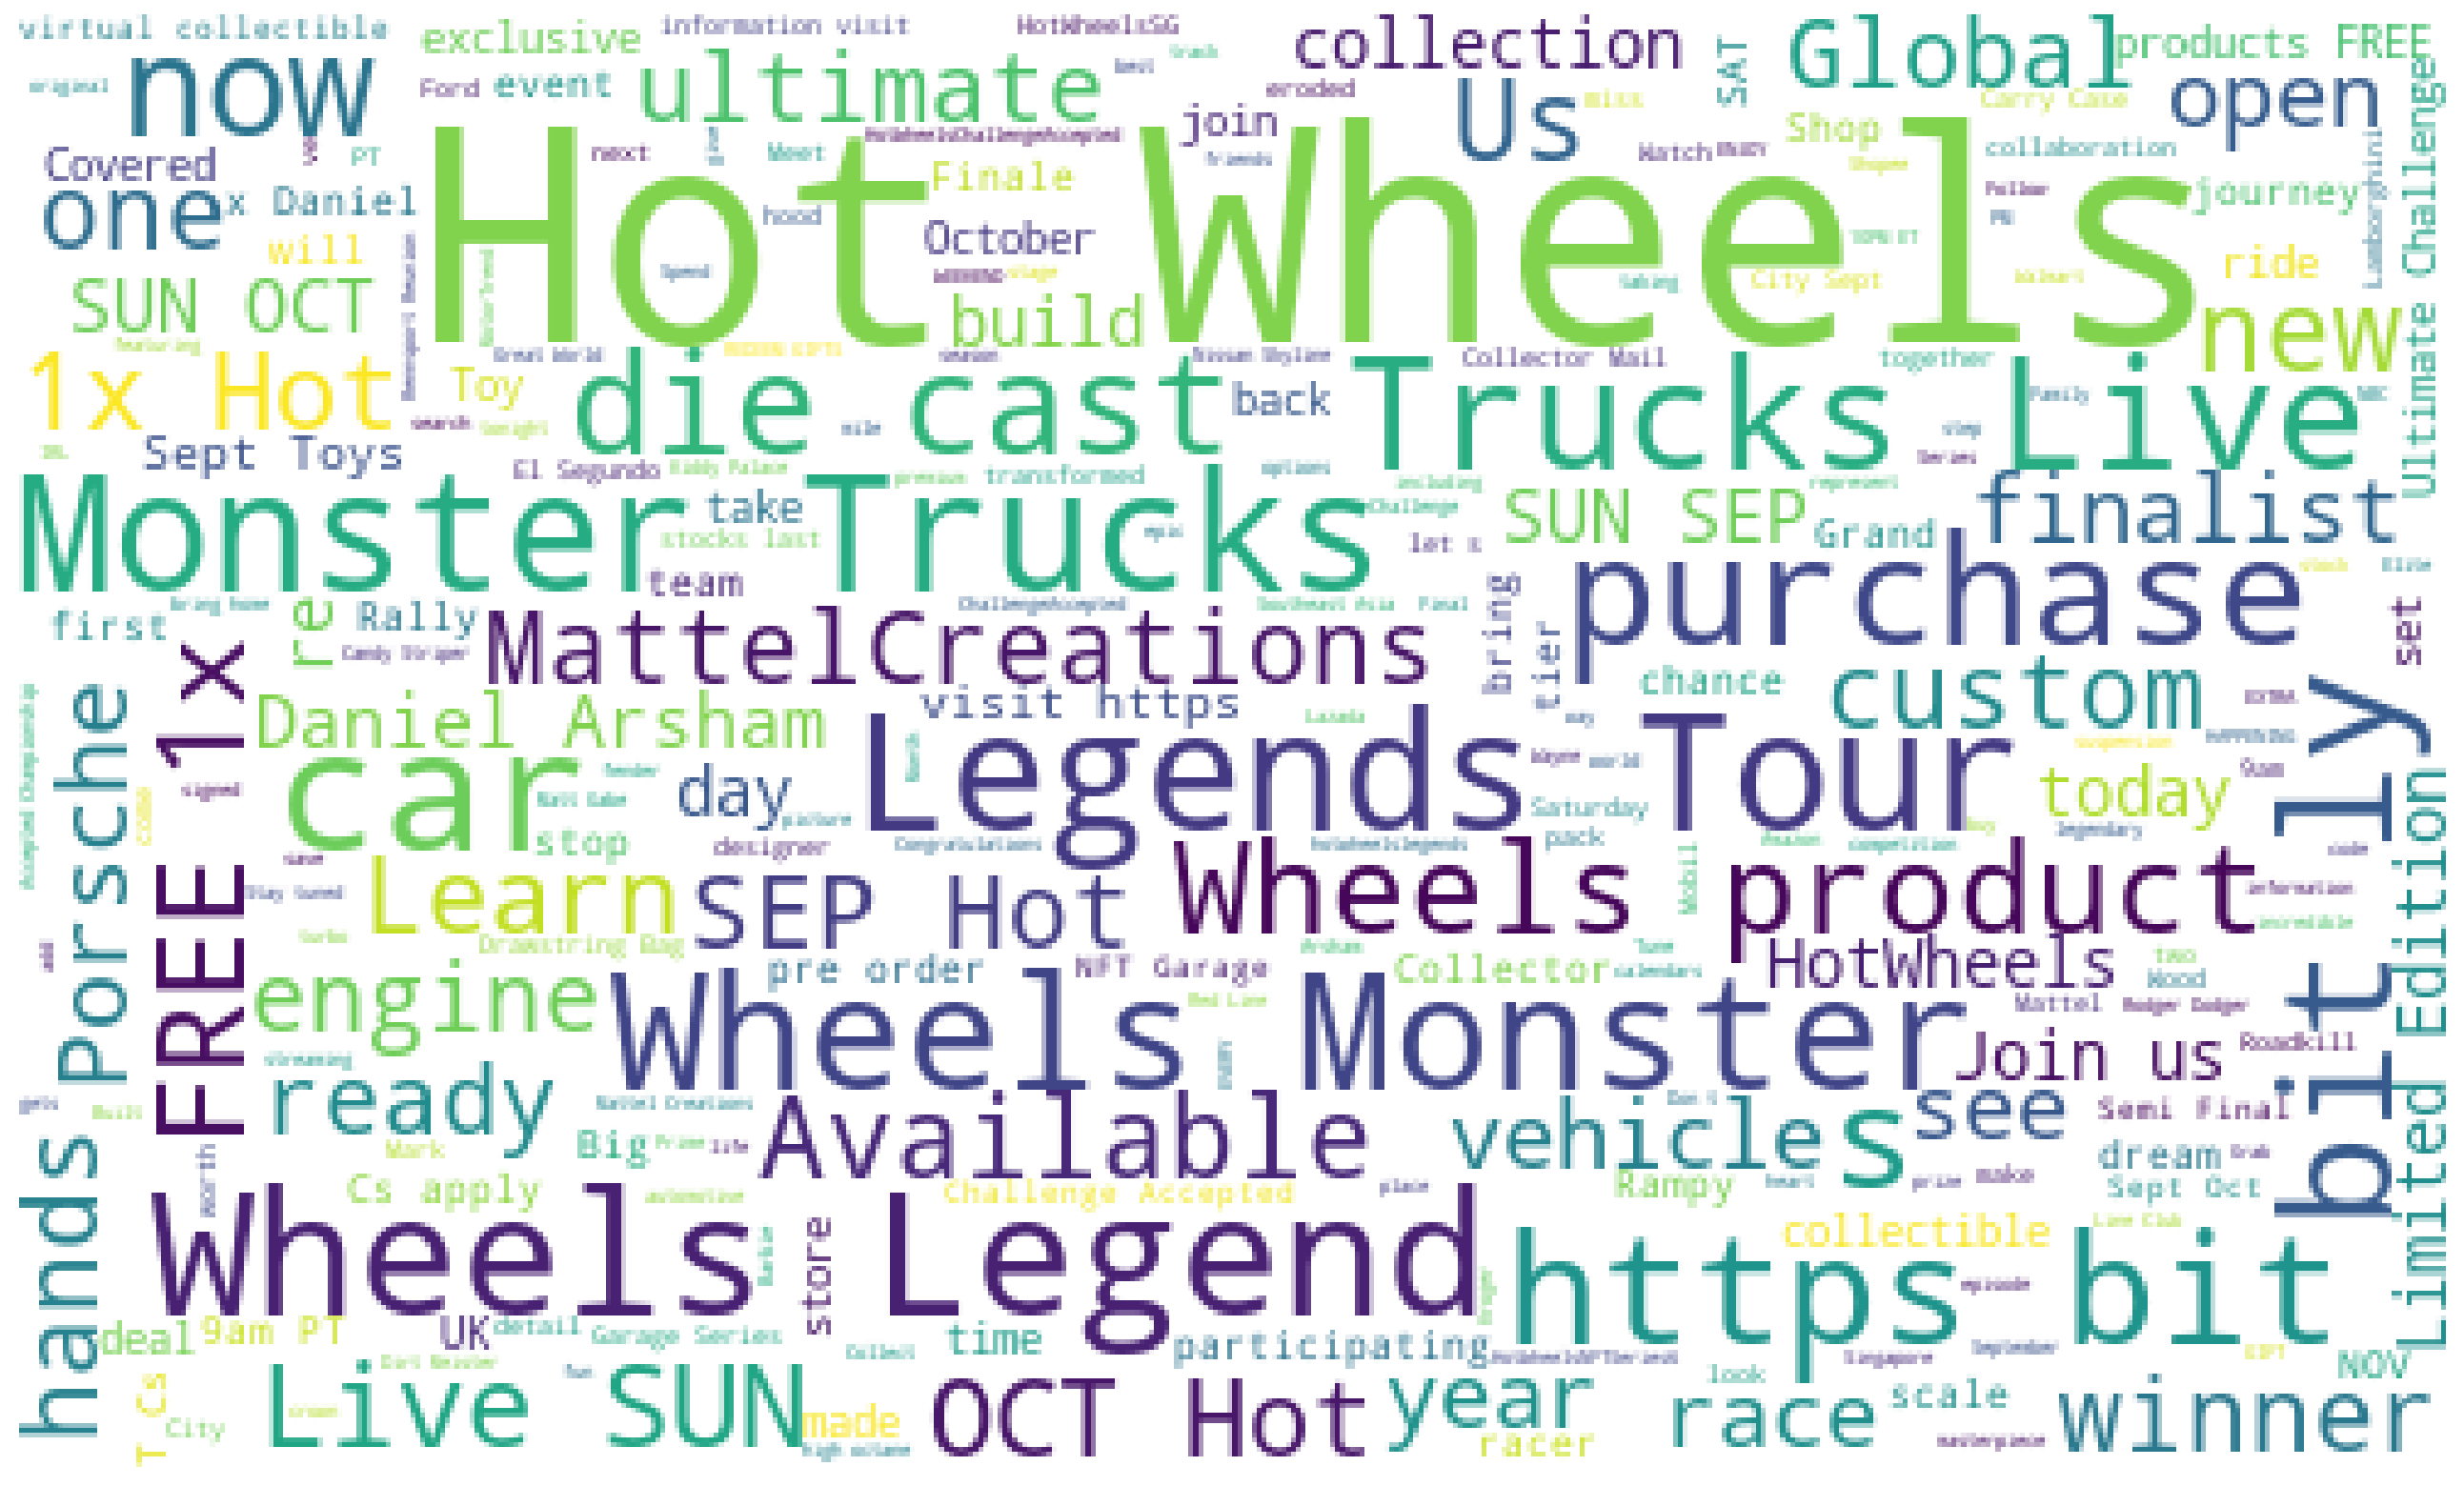

In [238]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## ===============================================================================================

## Tìm từ quan trọng nhất trong tiêu đề bài viết.

Để tìm được từ quan trọng nhất trong bài viết, ta cần tính chỉ số TF và IDF, rồi lấy tích của hai giá trị đó. Từ quan trọng nhất sẽ có giá trị lớn nhất.

In [239]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.8.1.


In [240]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [241]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(text)
# r.get_ranked_phrases()
res_cach1=r.get_ranked_phrases_with_scores()
print(res_cach1)

[(103.80812958970854, 'toys ” r ” us 🎁🦒 ✨ free 1x hot wheels carry case'), (103.80812958970854, 'toys ” r ” us 🎁🦒 ✨ free 1x hot wheels carry case'), (87.44232434232434, '✨ free 1x hot wheels limited edition hot wheels drawstring bag'), (87.44232434232434, '✨ free 1x hot wheels limited edition hot wheels drawstring bag'), (84.06878121878121, 'free 1x limited edition hot wheels ™️ drawstring bag *.'), (83.81732434232434, 'hot wheels products .. ✨ free 1x hot wheels collector mail'), (83.81732434232434, 'hot wheels products .. ✨ free 1x hot wheels collector mail'), (72.06878121878123, 'takashimaya 🔥😎 ⚡ free 1x hot wheels carry case'), (70.06878121878121, 'free 1x limited edition hot wheels ™️ collector mail'), (64.56878121878123, 'free 1x hot wheels limited edition drawstring bag'), (59.20687645687646, 'san diego comic con 🤝 hot wheels racerverse'), (57.80589606471959, '16 – 22 oct 🔥🔥 limited time hot wheels deals'), (56.67150453032806, 'toysrussg 🚨 new hot wheels legends tour finalist 🚨 

In [242]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique


a = [i[1] for i in res_cach1]
a.reverse()
a = get_unique_numbers(a)
print(a)    

['10th', '110mph', '15', '2000gt', '26', '29', '31', '40', '420hp', '50', '60', '600', '70', '89', 'accept', 'alarm', 'allows', 'along', 'anticipation', 'anz', 'arrived', 'artist', 'attend', 'authenticity', 'axle', 'backing', 'beadrolling', 'beast', 'becoming', 'bid', 'blurring', 'bone', 'books', 'born', 'brights', 'building', 'builds', 'buy', 'ca', 'calendars', 'careventsingapore', 'cart', 'casts', 'catalyst', 'celebrate', 'celebrating', 'celebrities', 'champion', 'chose', 'chosen', 'clock', 'collect', 'comes', 'compete', 'continuing', 'convenience', 'convert', 'copy', 'countdown', 'crafted', 'create', 'created', 'crown', 'crowning', 'customized', 'cyan', 'dallas', 'date', 'davidson', 'designing', 'determination', 'display', 'dominate', 'done', 'doorstep', 'drive', 'dust', 'earn', 'elite64lbwklamborghini', 'engineering', 'engineers', 'engines', 'enter', 'even', 'everything', 'except', 'exploring', 'fabrication', 'facing', 'fame', 'find', 'finished', 'flip', 'forget', 'function', 'fund

In [243]:
# Số từ xuất hiện trong tài liệu.
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

# Số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

4474
263


Chỉ số TF (Term Frequency) là số đo bằng "số lần xuất hiện của từ đó trong văn bản" / "tổng số từ trong văn bản".

In [244]:
#Tính TF từng từ.
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in a:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Only': 2, 'ten': 1, 'cars': 7, 'remain': 1, 'but': 4, 'only': 7, 'will': 5, 'the': 153, 'crown!': 1, 'Tune': 3, 'in': 33, 'this': 27, 'SATURDAY': 1, 'at': 58, 'PST': 2, 'and': 103, 'which': 2, 'be': 10, 'into': 16, 'a': 75, 'HotWheels': 1, 'die-cast': 12, 'Challengers,': 2, 'let’s': 2, 'full': 1, 'speed': 2, 'ahead': 1, 'Nov!': 1, 'ENJOY': 2, 'UP': 4, 'TO': 4, '70%': 2, 'OFF': 5, 'with': 44, 'Shopee': 2, '1111': 4, 'Big': 3, 'Sale': 2, '&': 24, 'Lazada’s': 1, 'Biggest': 1, 'of': 62, 'The': 28, 'Year!': 1, '🗓️': 3, 'BEST': 1, 'DEALS': 2, 'ONLY': 1, 'on': 62, '🤩': 5, ':': 2, 'EXTRA': 2, '$26': 1, 'Voucher*': 2, 'Lazada': 1, '$22': 1, '*T&Cs': 5, 'apply': 5, '💡🎁GIFT-WITH-PURCHASE': 1, 'AWAITS': 1, 'EACH': 1, 'STORE💡': 1, '🧡Shopee:': 1, 'FREE': 9, '1x': 14, 'Thomas': 1, 'Storage': 1, 'Box': 1, '$60': 2, 'above': 11, 'any': 6, '💙Lazada:': 1, 'Hot': 148, 'Wheels': 138, 'Limited': 5, 'Edition': 5, 'Drawstring': 4, 'Bag': 1, '$40': 3, '🚗🏎️💨': 1, 'Shop': 4, 'tracks,': 1, 'zoom,': 1, 'flip,': 

Chỉ số IDF (Inverse Document Frequency) là chỉ số bằng logarit ( "tổng số văn bản" / "số văn bản chứa từ đó" ).

In [245]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho từng từ.
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in a:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# Tính kết quả là tích TF*IDF.
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Only': 2.394100201829819, 'ten': 5.572154032177765, 'cars': 0.4016700371396128, 'remain': 5.572154032177765, 'but': 0.8536551608826699, 'only': 0.7438402948754634, 'will': 0.7846622893957187, 'the': 0.11256851803360554, 'crown!': 5.572154032177765, 'Tune': 0.8185638410713999, 'in': 0.14280840322332372, 'this': 0.16498226071764585, 'SATURDAY': 5.572154032177765, 'at': 0.19225667863730497, 'PST': 1.9612361195335402, 'and': 0.35721827456877897, 'which': 0.8536551608826699, 'be': 0.7201237682581474, 'into': 0.16498226071764585, 'a': 0.1472040146963618, 'HotWheels': 5.572154032177765, 'die-cast': 1.429019305786232, 'Challengers,': 1.8344844138943963, 'let’s': 2.1381668276926185, 'full': 5.572154032177765, 'speed': 0.5885474104694282, 'ahead': 5.572154032177765, 'Nov!': 5.572154032177765, 'ENJOY': 4.879006851617819, 'UP': 2.394100201829819, 'TO': 1.9085923860481182, '70%': 4.473541743509655, 'OFF': 2.799565309937983, 'with': 0.7123416278160924, 'Shopee': 1.2954879131617092, '1111': 1.07234

Những từ quan trọng sẽ có chỉ số TF-IDF cao.

In [246]:
# Lấy ra 20 từ quan trọng nhất.
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 20)

{'Hot': 0.02206037763822566,
 'Wheels': 0.01731997895736438,
 '&': 0.012413361613712736,
 'Live!': 0.011645721862399335,
 '-': 0.010134572409624457,
 'Legends': 0.009798481233825122,
 'SUN,': 0.009666970531357908,
 'of': 0.00893692926134884,
 '"R"': 0.008724196426674689,
 'Trucks': 0.008257764136989629,
 'and': 0.008223844944252176,
 '1x': 0.008062115471777567,
 'with': 0.007005594909232917,
 '–': 0.006759757823781332,
 'for': 0.006485910246632847,
 'Monster': 0.00629670523549089,
 'OCT': 0.006212822700045606,
 '🔥Toys': 0.005675920892944827,
 '✨FREE': 0.005314326490492174,
 'SEP': 0.005259897647093347}

Theo như dữ liệu phân tích, hai từ quan trọng nhất là "Hot" và "Wheels", là tên của fanpage và của hãng đồ chơi sở hữu trang facebook đó. Tiếp đến là những ký tự hay được sử dùng như "&", "-", "_", những từ nối như "with", "of", "for", những từ được sử dung trong bài đăng nhiều lần để nhấn mạnh, thông báo như "Live!" (thông báo phiên live), "Free" (khuyến mãi hoặc ưu đãi), "Toys" và "Trucks" (fanpage hãng đồ chơi ô tô), "OCT" và "SEP" là viết tắt của tháng 10 và tháng 9 (Vì những post livestream có tiêu đề được lưu về là ngày tháng live) và những từ khác.

## =============================================================================================================

## Thời gian đăng bài phổ biến.

([<matplotlib.axis.XTick at 0x2b63d0dd450>,
 [Text(23, 0, '23'),
  Text(6, 0, '6'),
  Text(17, 0, '17'),
  Text(17, 0, '17'),
  Text(0, 0, '0'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(20, 0, '20'),
  Text(18, 0, '18'),
  Text(18, 0, '18'),
  Text(16, 0, '16'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(15, 0, '15'),
  Text(17, 0, '17'),
  Text(20, 0, '20'),
  Text(16, 0, '16'),
  Text(22, 0, '22'),
  Text(18, 0, '18'),
  Text(15, 0, '15'),
  Text(19, 0, '19'),
  Text(15, 0, '15'),
  Text(8, 0, '8'),
  Text(18, 0, '18'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(17, 0, '17'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(21, 0, '21'),
  Text(21, 0, '21'),
  Text(21, 0, '21'),
  Text(21, 0, '21'),
  Text(21, 0, '21'),
  Text(21, 0, '21'),
  Text(20, 0, '20'),
  Text(18, 0, '18'),
  Text(16, 0, '16'),
  Text(6, 0, '6'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(0, 0, '0'),
  Text(17, 0, '17'),
  Text(23, 0, '23'),


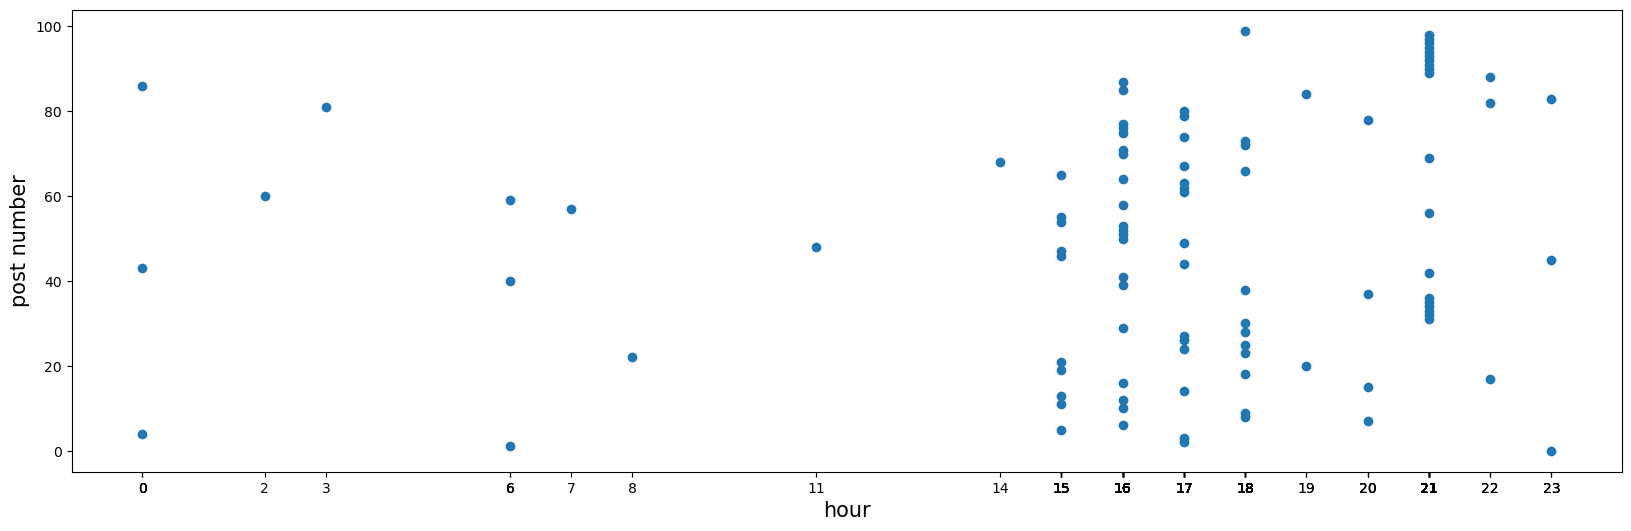

In [283]:
df_full['time'] = pd.to_datetime(df_full['time'])
x = df_full['time'].dt.hour
y = df_full['post_id'].index

plt.figure(figsize = (20,6))
plt.xlabel("hour", fontsize = 15)
plt.ylabel("post number", fontsize = 15)

plt.scatter(x,y)
plt.xticks(x)

Quan sát từ biểu đồ phân bố, ta nhận thấy tính fanpage Hot Wheels đăng bài viết với tần suất dày đặc hơn trong khoảng từ 15 giờ tới 24 giờ. Coi như thời gian thu được từ facebook là giờ Việt Nam (múi giờ GMT +7), quy đổi tương ứng qua giờ Mĩ (GMT -7) - nơi đặt trụ sở cũng như nơi có lượng người theo dõi chiếm tỷ lệ lớn nhất thì sẽ là 3 giờ sáng và 12 giờ trưa. Các điểm tập trung dày đặc nhất 